# Custom colourmaps taken from early-20th-century Czechoslovak Railways promotional posters



In [143]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Main imports and fonts set

In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams
import os



# ================================
# FONT CONFIGURATION
# ================================

# Disable LaTeX (so mathtext uses chosen font)
plt.rcParams['text.usetex'] = False

# Set base font size
fs = 11
rcParams.update({
    'font.size': fs,
    'axes.titlesize': fs,
    'axes.labelsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'legend.fontsize': fs,
})

# Path to Gill Sans
gill_sans_path = "/gpfs/home/mep22dku/scratch/FONTS/gill-sans/GillSansMedium.otf"

# Try to load it
if os.path.exists(gill_sans_path):
    font_manager.fontManager.addfont(gill_sans_path)
    gill_font_name = font_manager.FontProperties(fname=gill_sans_path).get_name()
    chosen_font = gill_font_name
    print(f"Using custom font: {gill_font_name}")
else:
    chosen_font = "DejaVu Sans"
    print("⚠️ Gill Sans not found, using fallback: DejaVu Sans")

# Apply globally
rcParams['font.family'] = chosen_font
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = chosen_font
rcParams['mathtext.it'] = chosen_font
rcParams['mathtext.bf'] = chosen_font




Using custom font: Gill Sans


## colormap definition

    Names: kostelec, prachovjezero, tatry, ceskyraj, prachovskaly, jested, krkonose

In [145]:
#kostelec - polsko
kostelec_6 = ['#C94B3C', '#E47A5C', '#A8B89C', '#6B9B7D', '#7FA4B8', '#4A3830']
kostelec_12 = ['#B23D32', '#C94B3C', '#E47A5C', '#D89B7A', '#E5C9A8', '#C8D4B8', '#A8B89C', '#6B9B7D', '#7FA4B8', '#5B7A8C', '#4A3830', '#2A1F1A']

#prachov - jezero 
prachovjezero_6 = ['#E85A2A', '#F4A63D', '#6B8C3E', '#5B9BAD', '#4A6B8A', '#6B3428']
prachovjezero_12 = ['#D84B28', '#E85A2A', '#F27435', '#F4A63D', '#D4B665', '#89A648', '#6B8C3E', '#4E7054', '#5B9BAD', '#4A6B8A', '#6B3428', '#3D2820']

# Tatry 
tatry_6 = ['#9B7850', '#D4C8A8', '#5B7F68', '#7BA6BC', '#A8BECF', '#3A4F3C']
tatry_12 = ['#7A5F40', '#9B7850', '#C4B090', '#E5D8B8', '#B8D090', '#8FAB80', '#5B7F68', '#5B7B7C', '#7BA6BC', '#A8BECF', '#3A4F3C', '#2B3A2E']
#cesky raj
ceskyraj_6 = ['#B8734E', '#D4A562', '#6B8BA8', '#4B6B8C', '#8B5B7A', '#3A2F28']
ceskyraj_12 = ['#A85C3C', '#B8734E', '#D49558', '#D4A562', '#E5C485', '#9CB68A', '#6B8B72', '#6B8BA8', '#4B6B8C', '#8B5B7A', '#5B3F4A', '#3A2F28']

## prachov - skaly
prachovskaly_6 = ['#B8844E', '#D4A865', '#6B8B5C', '#4B7B8C', '#2B5B8C', '#1B3F5C']
prachovskaly_12 = ['#9B6B3C', '#B8844E', '#C89B5A', '#D4A865', '#E5C68A', '#8BA872', '#6B8B5C', '#4B6B5A', '#5B8B9C', '#4B7B8C', '#2B5B8C', '#1B3F5C']

## jested lanovka
jested_6 = ['#D86B45', '#D4B870', '#8FAB7C', '#5B7B8C', '#6B8BAC', '#3A5B48']
jested_12 = ['#C85B3A', '#D86B45', '#E59B58', '#D4B870', '#E5D090', '#B8C88C', '#8FAB7C', '#6B8B78', '#5B7B8C', '#6B8BAC', '#4B6B5C', '#3A5B48']

## krkonose 
krkonose_6 = ['#E5A542', '#C4D858', '#6B8B5C', '#4B6B8C', '#7A9BAC', '#8B6B47']
krkonose_12 = ['#B87A3C', '#E5A542', '#F5C855', '#D4DB6A', '#C4D858', '#A8C850', '#6B8B5C', '#5B7B6C', '#4B6B8C', '#7A9BAC', '#8B6B47', '#5B4B38']

## code to produce map demo

    based on a sin curve with customizable amplitude and offset, max and min of plots also customizable

In [146]:


def make_cmap_demo(colors_6, colors_12, fnam, wave_amplitude = 2.5,
                  layer_thickness = 10, x_offset_increment = 1,
                   xmi1 = 2, xma1 = 8, ymi1 = -5, yma1 = 45,
                    xmi2 = 2, xma2 = 8, ymi2 = -10, yma2 = 105, fact = 0.5):

    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(24*fact, 8*fact))

    # --- FIRST PLOT: blank white ---
    img = plt.imread(f'./vlaky/{fnam}.jpg')  # Replace with your image path
    ax0.imshow(img)
    ax0.axis('off')
    ax0.axis('off')

    # Generate x values
    x = np.linspace(0, 10, 200)

    # Parameters

    # --- SECOND PLOT: 6 colors ---
    np.random.seed(42)
    series_6 = []
    for i in range(6):
        # Each layer has a consistent base thickness with sine wave variation
        base = i * layer_thickness + wave_amplitude * np.sin(x - i * x_offset_increment)
        noise = np.random.normal(0, 0.2, len(x))
        #series_6.append(base + noise)
        series_6.append(base)


    # Print y range for 6-color plot
    all_values_6 = np.concatenate([[0], *series_6])
    print(f"6-color plot - y min: {all_values_6.min():.2f}, y max: {series_6[-1].max():.2f}")

    ax1.fill_between(x, ymi1, series_6[0], color=colors_6[0], alpha=1, linewidth=0, label=colors_6[0])
    for i in range(1, 6):
        ax1.fill_between(x, series_6[i-1], series_6[i], color=colors_6[i], alpha=1, linewidth=0, label=colors_6[i])


    ax1.margins(0)
    ax1.axis('off')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.02), framealpha=0.9, fontsize=8, ncol=2)

    # --- THIRD PLOT: 12 colors ---
    np.random.seed(43)
    series_12 = []
    for i in range(12):
        base = i * layer_thickness + wave_amplitude * np.sin(x - i * x_offset_increment)
        noise = np.random.normal(0, 0.15, len(x))
        #series_12.append(base + noise)
        series_12.append(base)

    # Print y range for 12-color plot
    all_values_12 = np.concatenate([[0], *series_12])
    print(f"12-color plot - y min: {all_values_12.min():.2f}, y max: {series_12[-1].max():.2f}")

    ax2.fill_between(x, ymi2, series_12[0], color=colors_12[0], alpha=1, linewidth=0, label=colors_12[0])
    for i in range(1, 12):
        ax2.fill_between(x, series_12[i-1], series_12[i], color=colors_12[i], alpha=1, linewidth=0, label=colors_12[i])


    ax2.margins(0)
    ax2.axis('off')
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.02), framealpha=0.9, fontsize=8, ncol=3)

    ax1.set_xlim([xmi1, xma1])
    ax1.set_ylim([ymi1, yma1])
    ax2.set_xlim([xmi2, xma2])
    ax2.set_ylim([ymi2, yma2])

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0.1, wspace=0.05, hspace=0)
    plt.show()
    fig.savefig(f'./vlaky/{fnam}-cmap.jpg', dpi = 300, bbox_inches='tight')

6-color plot - y min: -4.50, y max: 54.50
12-color plot - y min: -4.50, y max: 114.50


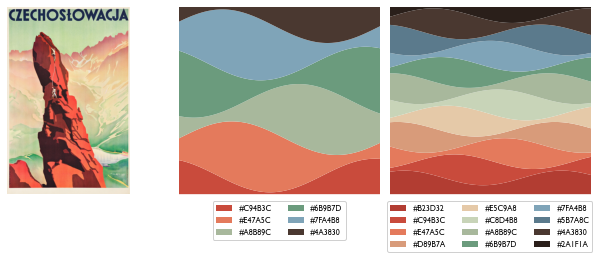

In [147]:
colors_6 = kostelec_6; colors_12 = kostelec_12; fnam = 'kostelec'

make_cmap_demo(colors_6, colors_12, fnam, wave_amplitude = 4.5,
                  layer_thickness = 10, x_offset_increment = 2,
                   xmi1 = 2, xma1 = 8, ymi1 = -5, yma1 = 45,
                    xmi2 = 1, xma2 = 9, ymi2 = -10, yma2 = 105, fact = 0.36)

6-color plot - y min: -5.50, y max: 55.50
12-color plot - y min: -5.50, y max: 115.50


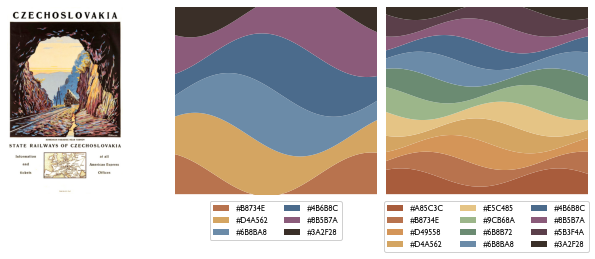

In [148]:
colors_6 = ceskyraj_6; colors_12 = ceskyraj_12; fnam = 'ceskyraj'

make_cmap_demo(colors_6, colors_12, fnam, wave_amplitude = 5.5,
                  layer_thickness = 10, x_offset_increment = 1,
                   xmi1 = 2, xma1 = 8, ymi1 = -5, yma1 = 42,
                    xmi2 = 1, xma2 = 9, ymi2 = -10, yma2 = 102, fact = 0.36)

6-color plot - y min: -6.50, y max: 56.50
12-color plot - y min: -6.50, y max: 116.50


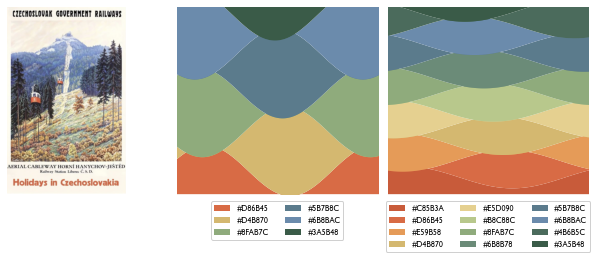

In [149]:
colors_6 = jested_6; colors_12 = jested_12; fnam = 'jested'

make_cmap_demo(colors_6, colors_12, fnam, wave_amplitude = 6.5,
                  layer_thickness = 10, x_offset_increment = 3,
                   xmi1 = 0.5, xma1 = 8, ymi1 = -6, yma1 = 42,
                    xmi2 = 1, xma2 = 7, ymi2 = -10, yma2 = 102, fact = 0.36)

6-color plot - y min: -6.00, y max: 56.00
12-color plot - y min: -6.00, y max: 116.00


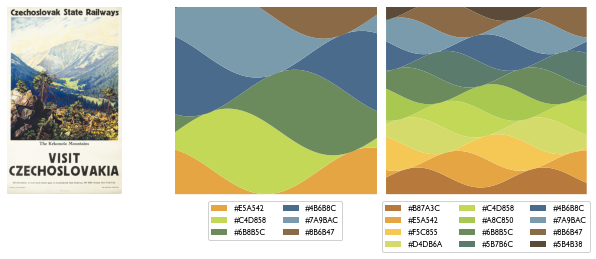

In [150]:
colors_6 = krkonose_6; colors_12 = krkonose_12; fnam = 'krkonose'

make_cmap_demo(colors_6, colors_12, fnam, wave_amplitude = 6,
                  layer_thickness = 10, x_offset_increment = 2,
                   xmi1 = 2, xma1 = 8, ymi1 = -6, yma1 = 42,
                    xmi2 = 0, xma2 = 10, ymi2 = -10, yma2 = 102, fact = 0.36)

6-color plot - y min: -6.00, y max: 56.00
12-color plot - y min: -6.00, y max: 116.00


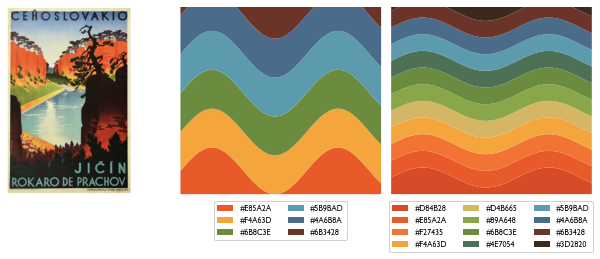

In [151]:
colors_6 = prachovjezero_6; colors_12 = prachovjezero_12; fnam = 'prachovjezero'

make_cmap_demo(colors_6, colors_12, fnam, wave_amplitude = 6,
                  layer_thickness = 10, x_offset_increment = 0,
                   xmi1 = 0, xma1 = 10, ymi1 = -6, yma1 = 42,
                    xmi2 = 0, xma2 = 10, ymi2 = -10, yma2 = 102, fact = 0.36)

6-color plot - y min: 0.00, y max: 50.00
12-color plot - y min: 0.00, y max: 110.00


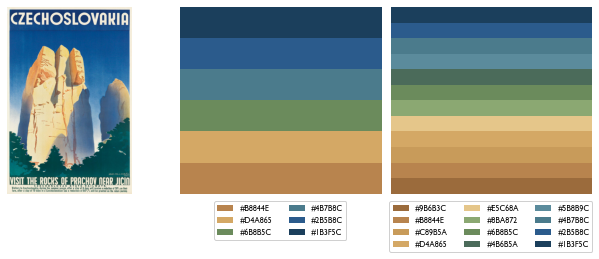

In [152]:
colors_6 = prachovskaly_6; colors_12 = prachovskaly_12; fnam = 'prachovskaly'

make_cmap_demo(colors_6, colors_12, fnam, wave_amplitude = 0,
                  layer_thickness = 10, x_offset_increment = 0,
                   xmi1 = 2, xma1 = 8, ymi1 = -10, yma1 = 50,
                    xmi2 = 2, xma2 = 8, ymi2 = -10, yma2 = 110, fact = 0.36)

6-color plot - y min: -10.00, y max: 60.00
12-color plot - y min: -10.00, y max: 120.00


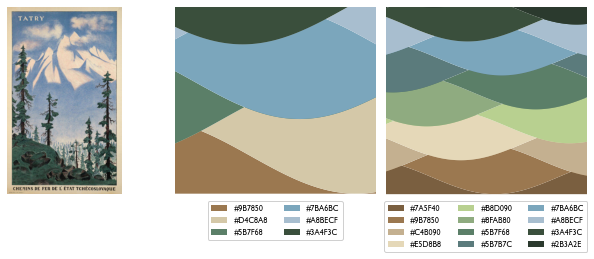

In [153]:
colors_6 = tatry_6; colors_12 = tatry_12; fnam = 'tatry'

make_cmap_demo(colors_6, colors_12, fnam, wave_amplitude = 10,
                  layer_thickness = 10, x_offset_increment =9,
                   xmi1 = 2, xma1 = 5, ymi1 = -10, yma1 = 40,
                    xmi2 = 2, xma2 = 7, ymi2 = -10, yma2 = 100, fact = 0.36)